# A/B Test Analysis: Impact of Advertising on Conversion

## 🧠 Objective
This project analyzes the effectiveness of showing product advertisements compared to public service announcements (PSAs) on user conversion rates.

We simulate a real-world A/B test where:
- Group A (test group = `ad`) saw product advertisements.
- Group B (test group = `psa`) saw public service announcements.

## 🎯 Goal
Determine whether showing product ads leads to a **statistically significant** increase in user conversions compared to PSAs.

## 🧪 Hypothesis
- **Null Hypothesis (H₀):** There is **no difference** in conversion rates between the ad and PSA groups.
- **Alternative Hypothesis (H₁):** The **ad group has a higher** conversion rate than the PSA group.

We’ll test this using statistical methods and explore how ad volume and timing influence conversion behavior.

## 📊 Dataset Description
Each row represents a user exposed to ads or PSAs, with:
- `user id`: unique identifier
- `test group`: ad or psa
- `converted`: whether the user bought the product
- `total ads`: total number of ads seen
- `most ads day`: day with the highest ad exposure
- `most ads hour`: hour with the highest ad exposure


## 📦 Step 1: Load and Inspect the Data

We begin by loading the dataset and inspecting its structure for any issues such as:
- Incorrect types
- Missing values
- Unexpected values

We also format the data for easier analysis.


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('marketing_AB.csv')

# Display first few rows
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [5]:
# Dataset info
df.info()

# Summary stats
df.describe(include='all')

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

## 🔧 Step 2: Data Preprocessing

We'll clean and format the data:
- Convert `converted` from string to boolean
- Standardize `test group` to lowercase
- Extract features if needed (like converting `most ads hour` to int)


In [11]:
# Convert 'converted' to boolean
df['converted'] = df['converted'].astype(str).str.lower() == 'true'

# Standardize 'test group'
df['test group'] = df['test group'].str.strip().str.lower()

# Strip and clean 'most ads day'
df['most ads day'] = df['most ads day'].str.strip()

# Convert 'most ads hour' to int
df['most ads hour'] = pd.to_numeric(df['most ads hour'], errors='coerce')

# Final check
df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## 📊 Step 3: Exploratory Data Analysis (EDA)

Now that the data is cleaned, we’ll explore:

- Group sizes and conversion rates
- Conversion rates between ad and PSA groups
- Relationship between ad exposure and conversion
- Peak days and hours for ad exposure


In [14]:
# Group size
group_counts = df['test group'].value_counts()
print("Group Sizes:\n", group_counts)

# Conversion rate by group
conversion_rate = df.groupby('test group')['converted'].mean()
print("\nConversion Rates:\n", conversion_rate)

# Combined summary
summary = df.groupby('test group')['converted'].agg(['count', 'sum', 'mean'])
summary.columns = ['Total Users', 'Conversions', 'Conversion Rate']
summary


Group Sizes:
 test group
ad     564577
psa     23524
Name: count, dtype: int64

Conversion Rates:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


,Total Users,Conversions,Conversion Rate
test group,,,
ad,564577,14423,0.025547
psa,23524,420,0.017854


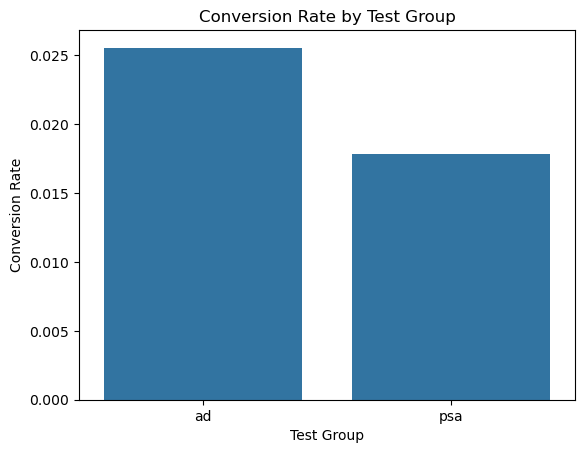

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of conversion rate
sns.barplot(x=summary.index, y='Conversion Rate', data=summary.reset_index())
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.show()


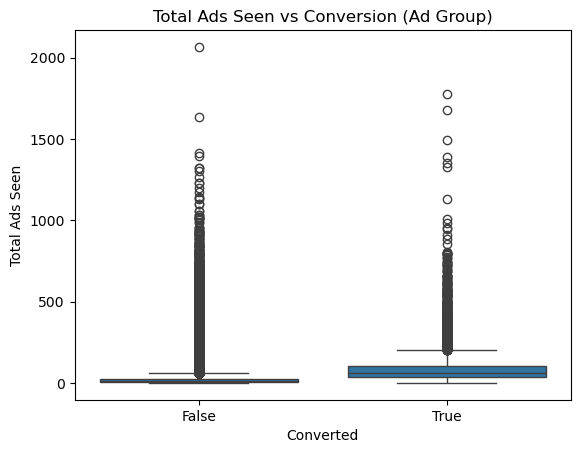

In [18]:
# Strip to ad group only
ad_group = df[df['test group'] == 'ad']

# Compare total ads seen for converters vs non-converters
sns.boxplot(x='converted', y='total ads', data=ad_group)
plt.title('Total Ads Seen vs Conversion (Ad Group)')
plt.xlabel('Converted')
plt.ylabel('Total Ads Seen')
plt.show()


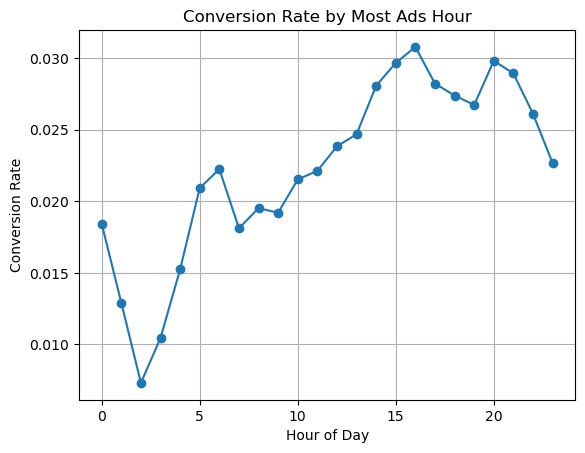

In [20]:
# Conversion rate by hour
hourly_conv = df.groupby('most ads hour')['converted'].mean()

# Line plot
hourly_conv.plot(kind='line', marker='o')
plt.title('Conversion Rate by Most Ads Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()


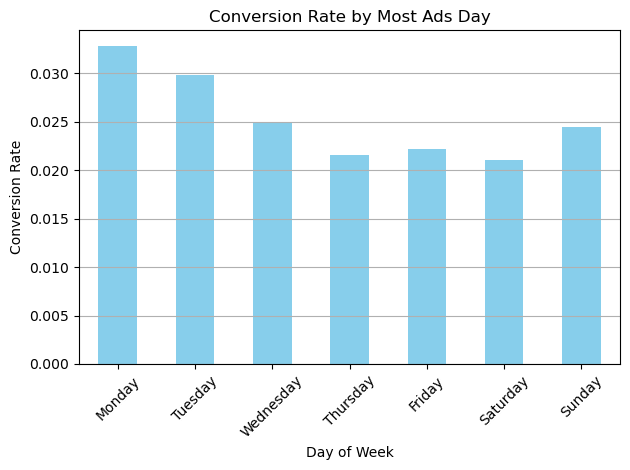

In [30]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Ensure consistent formatting
df['most ads day'] = df['most ads day'].str.strip().str.capitalize()

# Group by day and calculate conversion rate
day_conv = df.groupby('most ads day')['converted'].mean().reindex(weekday_order)

# Plot
day_conv.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Most Ads Day')
plt.xlabel('Day of Week')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 🧪 Step 4: A/B Testing — Is the Difference Significant?

We’ve observed a higher conversion rate in the ad group vs. the PSA group.
To determine if this difference is statistically significant (i.e., not due to chance), we’ll perform a **two-proportion z-test**.

### 🧠 Hypotheses

- **Null Hypothesis (H₀)**: Conversion rates are equal in both groups (p₁ = p₂)
- **Alternative Hypothesis (H₁)**: Conversion rate is higher in the ad group (p₁ > p₂)

We’ll use a **significance level α = 0.05**.


In [33]:
from statsmodels.stats.proportion import proportions_ztest

# Count of conversions in each group
conv_counts = df.groupby('test group')['converted'].sum()
# Total users in each group
n_obs = df['test group'].value_counts().sort_index()

# Run one-sided z-test (ad > psa)
z_stat, p_val = proportions_ztest(count=conv_counts, nobs=n_obs, alternative='larger')

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")


Z-statistic: 7.3701
P-value: 0.0000


## A/B Test Results

Our **two-proportion z-test** comparing conversion rates between the **ad** and **PSA** groups gave the following results:

- **Z-statistic**: 7.37  
- **P-value**: < 0.0001

### 🎯 Interpretation:
Since the p-value is well below the 0.05 threshold, we **reject the null hypothesis**. This means the difference in conversion rates between the groups is **statistically significant** — not due to random chance.



## 📈 Lift Analysis: How Much Better Did the Ad Group Perform?

To quantify the impact of the ad feature, we calculated **Lift** — how much higher the conversion rate was in the ad group compared to the PSA group.

In [36]:
# Step 1: Get conversion rates
conv_rate_ad = df[df['test group'] == 'ad']['converted'].mean()
conv_rate_psa = df[df['test group'] == 'psa']['converted'].mean()

# Step 2: Calculate lift
lift = (conv_rate_ad - conv_rate_psa) / conv_rate_psa * 100

# Step 3: Print it
print(f"Ad Group Conversion Rate: {conv_rate_ad:.4f}")
print(f"PSA Group Conversion Rate: {conv_rate_psa:.4f}")
print(f"Lift: {lift:.2f}%")


Ad Group Conversion Rate: 0.0255
PSA Group Conversion Rate: 0.0179
Lift: 43.09%


### 📊 Results:
- **Ad Group Conversion Rate**: 2.55%
- **PSA Group Conversion Rate**: 1.79%
- **Relative Lift**: **+43.09%**

### 📌 Interpretation:
> The **ad group converted 43.09% more** than the PSA group.  
> This reinforces our previous result: the ad feature has a strong, meaningful impact on user behavior — not only is it statistically significant, but the business effect is large.


## ✅ Final Conclusion

After analyzing user behavior and running a controlled A/B test, we reached the following conclusions:

1. **The ad group had a significantly higher conversion rate** than the PSA group:
   - **Ad Group**: 2.55%
   - **PSA Group**: 1.79%

2. A statistical test confirmed this difference is **not due to chance**:
   - **Z-statistic**: 7.37
   - **P-value**: < 0.0001

3. The **relative lift** in performance is:
   - **+43.09%**

### 📌 Key Takeaway:
> Showing users targeted product ads led to a **43% increase in conversions** compared to a neutral message — and this result is statistically significant.

### 📈 Business Recommendation:
The ad feature is clearly effective and worth rolling out to a wider user base. Future work could focus on optimizing ad timing and frequency to further improve results.
